# Future sales prediction
---

## Setup & Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import matplotlib.gridspec as gridspec
from termcolor import colored
import gc

plt.style.use('seaborn-whitegrid')
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Data

In [4]:
# file paths
DATASET_PATH = './datasets/predict_future_sales'
TRAIN_SALES_CSV = DATASET_PATH + '/sales_train.csv'
SHOPS_CSV = DATASET_PATH +'/shops.csv'
ITEMS_CSV= DATASET_PATH +'/items.csv'
ITEM_CATEGORY_CSV = DATASET_PATH +'/item_categories.csv'
TEST_CSV = DATASET_PATH +'/test.csv'

In [5]:
def show_data(df_train,heading='TRAIN DATA'):
    
    """
    function which gives basic data information
    Args:
        df_train: pandas dataframe
        heading: deading to display
    Returns:
        None
    """

    print(colored(heading,'red'))
    print('')
    print('Date shape')
    print(f'shape:{df_train.shape}')
    print('')
    print('--'*50)
    print('')
    print('Sample:')
    print(df_train.head(3).to_markdown())
    print('')
    print('--'*50)
    print('')
    print('Columns and data types:')
    print('')
    print(df_train.info())

In [7]:
df_train = pd.read_csv(TRAIN_SALES_CSV)
df_shop = pd.read_csv(SHOPS_CSV)
df_item = pd.read_csv(ITEMS_CSV)
df_itemcat = pd.read_csv(ITEM_CATEGORY_CSV)
df_test = pd.read_csv(TEST_CSV)

show_data(df_train,heading='TRAIN DATA')
print('')
print('__'*40)
print('')
show_data(df_shop,heading='SHOP DATA')
print('')
print('__'*40)
print('')
show_data(df_item,heading='ITEM DETAILS DATA')
print('__'*40)
print('')
show_data(df_itemcat,heading='ITEM CATEGORY DATA')
print('__'*40)
print('')
show_data(df_test,heading='TEST DATA')

TRAIN DATA

Date shape
shape:(1579277, 6)

----------------------------------------------------------------------------------------------------

Sample:
|    | date       |   date_block_num |   shop_id |   item_id |   item_price |   item_cnt_day |
|---:|:-----------|-----------------:|----------:|----------:|-------------:|---------------:|
|  0 | 02.01.2013 |                0 |        59 |     22154 |          999 |              1 |
|  1 | 03.01.2013 |                0 |        25 |      2552 |          899 |              1 |
|  2 | 05.01.2013 |                0 |        25 |      2552 |          899 |             -1 |

----------------------------------------------------------------------------------------------------

Columns and data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579277 entries, 0 to 1579276
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            1579277 non-null 

In [8]:
### Merging all dataframes together
dff = df_train.merge(df_item,on="item_id")
dff = dff.merge(df_itemcat,on="item_category_id")
dff = dff.merge(df_shop,on="shop_id")
dff = dff.drop(columns=["item_name"])

#masking a copy
df = dff.copy()
# df.to_csv('merged_original.csv',index=False)
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154.00,999.00,1.00,37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,26.04.2013,3,59,944.00,150.00,1.00,37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,26.06.2013,5,59,944.00,199.50,1.00,37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,20.07.2013,6,59,944.00,199.50,1.00,37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,14.09.2013,8,59,944.00,299.00,2.00,37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


## Analytics on Date

In [9]:
df["date"]=  pd.to_datetime(df["date"], format='%d.%m.%Y')
df.sort_values(by="date", ascending=True, inplace=True)
print(f'Minimum data present: {df["date"].min()}')
print(f'Maximum date present: {df["date"].max()}')

Minimum data present: 2013-01-01 00:00:00
Maximum date present: 2014-04-30 00:00:00


In [10]:
# sorting dataframe based on date
df = df.sort_values(by='date').reset_index(drop=True)
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_category_name,shop_name
0,2013-01-01,0,54,12370.00,149.00,1.00,40,Кино - DVD,"Химки ТЦ ""Мега"""
1,2013-01-01,0,7,14665.00,199.00,1.00,55,Музыка - CD локального производства,"Воронеж ТРЦ ""Максимир"""
2,2013-01-01,0,54,7299.00,399.00,1.00,55,Музыка - CD локального производства,"Химки ТЦ ""Мега"""
3,2013-01-01,0,51,3870.00,399.00,1.00,30,Игры PC - Стандартные издания,"Тюмень ТЦ ""Зеленый Берег"""
4,2013-01-01,0,54,8894.00,299.00,1.00,37,Кино - Blu-Ray,"Химки ТЦ ""Мега"""


## Item cnt day

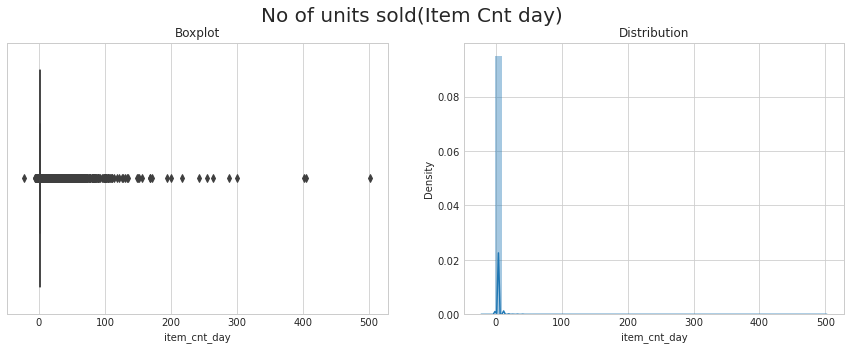

In [11]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(df['item_cnt_day'],ax=axes[0])
axes[0].set_title('Boxplot')
sns.distplot(df['item_cnt_day'],ax=axes[1])
axes[1].set_title('Distribution')
plt.suptitle('No of units sold(Item Cnt day)',fontsize="20")
plt.show()


In [12]:
print(f'Minimum value {df["item_cnt_day"].min()}')
print(f'Maximum value {df["item_cnt_day"].max()}')

Minimum value -22.0
Maximum value 502.0


In [13]:
# Let us print percentile values
for i in range(0,101,10):
    print(f'{i}th percentile value for item_cnt_day is {np.percentile(df["item_cnt_day"],i)}')
    
print('--'*50)

for i in range(90,100):
    print(f'{i}th percentile value for item_cnt_day is {np.percentile(df["item_cnt_day"],i)}')
    
print('--'*50)

for i in range(1,10):
    k = 99 + i/10 
    print(f'{k}th percentile value for item_cnt_day is {np.percentile(df["item_cnt_day"],k)}')

0th percentile value for item_cnt_day is -22.0
10th percentile value for item_cnt_day is 1.0
20th percentile value for item_cnt_day is 1.0
30th percentile value for item_cnt_day is 1.0
40th percentile value for item_cnt_day is 1.0
50th percentile value for item_cnt_day is 1.0
60th percentile value for item_cnt_day is 1.0
70th percentile value for item_cnt_day is 1.0
80th percentile value for item_cnt_day is 1.0
90th percentile value for item_cnt_day is 2.0
100th percentile value for item_cnt_day is 502.0
----------------------------------------------------------------------------------------------------
90th percentile value for item_cnt_day is 2.0
91th percentile value for item_cnt_day is 2.0
92th percentile value for item_cnt_day is 2.0
93th percentile value for item_cnt_day is 2.0
94th percentile value for item_cnt_day is 2.0
95th percentile value for item_cnt_day is 2.0
96th percentile value for item_cnt_day is 2.0
97th percentile value for item_cnt_day is 3.0
98th percentile value

In [14]:
# we will remove some extreme out layers
df[df['item_cnt_day'] > df['item_cnt_day'].quantile(0.95)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_category_name,shop_name
11,2013-01-01,0,54,1249.00,299.00,3.00,55,Музыка - CD локального производства,"Химки ТЦ ""Мега"""
72,2013-01-01,0,28,98.00,399.00,5.00,40,Кино - DVD,"Москва ТЦ ""МЕГА Теплый Стан"" II"
202,2013-01-01,0,46,1830.00,599.00,3.00,30,Игры PC - Стандартные издания,"Сергиев Посад ТЦ ""7Я"""
283,2013-01-01,0,54,5822.00,999.00,3.00,35,Карты оплаты - PSN,"Химки ТЦ ""Мега"""
293,2013-01-01,0,13,13598.00,9.00,3.00,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Казань ТЦ ""Бехетле"""
...,...,...,...,...,...,...,...,...,...
1579225,2014-04-30,15,21,2814.00,899.00,3.00,28,Игры PC - Дополнительные издания,"Москва МТРЦ ""Афи Молл"""
1579239,2014-04-30,15,26,2685.00,799.00,3.00,30,Игры PC - Стандартные издания,"Москва ТЦ ""Ареал"" (Беляево)"
1579265,2014-04-30,15,56,20949.00,5.00,4.00,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Чехов ТРЦ ""Карнавал"""
1579266,2014-04-30,15,54,10718.00,399.00,3.00,40,Кино - DVD,"Химки ТЦ ""Мега"""


In [15]:
df[df['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_category_name,shop_name
109,2013-01-01,0,19,20383.00,1229.00,-1.00,72,Подарки - Фигурки,"Курск ТЦ ""Пушкинский"""
228,2013-01-01,0,18,6724.00,299.50,-1.00,21,Игры - PSP,"Красноярск ТЦ ""Июнь"""
503,2013-01-01,0,54,3429.00,2799.00,-1.00,23,Игры - XBOX 360,"Химки ТЦ ""Мега"""
711,2013-01-01,0,19,13086.00,1499.00,-1.00,62,"Подарки - Гаджеты, роботы, спорт","Курск ТЦ ""Пушкинский"""
954,2013-01-01,0,37,9601.00,849.00,-1.00,40,Кино - DVD,"Новосибирск ТЦ ""Мега"""
...,...,...,...,...,...,...,...,...,...
1577092,2014-04-28,15,57,17481.00,578.56,-1.00,38,Кино - Blu-Ray 3D,"Якутск Орджоникидзе, 56"
1577404,2014-04-28,15,54,21358.00,502.49,-1.00,37,Кино - Blu-Ray,"Химки ТЦ ""Мега"""
1577457,2014-04-28,15,56,4870.00,799.00,-1.00,23,Игры - XBOX 360,"Чехов ТРЦ ""Карнавал"""
1577613,2014-04-29,15,54,17709.00,899.00,-1.00,19,Игры - PS3,"Химки ТЦ ""Мега"""


In [16]:
print(f'shape of data after before outliers: {df.shape}')
df = df[df['item_cnt_day'] >= 0]
upper_quantile = df['item_cnt_day'].quantile(0.95)
print(f'Removing values greater that upper_quantile {upper_quantile} and less than 0')
df['item_cnt_day'] = np.where(df['item_cnt_day'] > upper_quantile, upper_quantile, df['item_cnt_day'])

print(f'shape of data after removing outliers: {df.shape}')
print(f'Minimum units of product sold a time {df["item_cnt_day"].min()}')
print(f'Maximum units of product sold a time {df["item_cnt_day"].max()}')

shape of data after before outliers: (1579276, 9)
Removing values greater that upper_quantile 2.0 and less than 0
shape of data after removing outliers: (1575334, 9)
Minimum units of product sold a time 1.0
Maximum units of product sold a time 2.0


## Item price

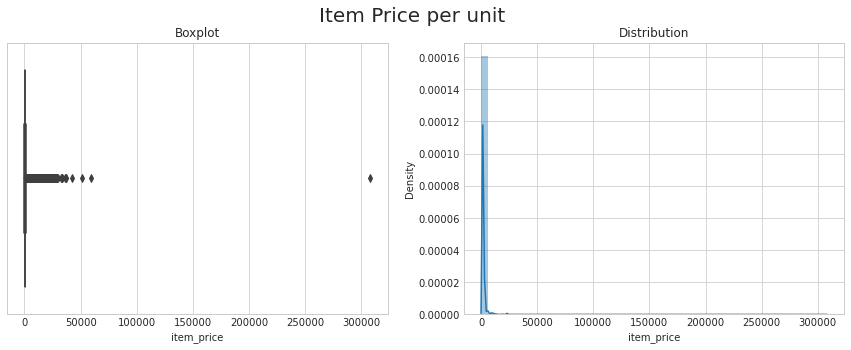

In [17]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(df['item_price'],ax=axes[0])
axes[0].set_title('Boxplot')
sns.distplot(df['item_price'],ax=axes[1])
axes[1].set_title('Distribution')
plt.suptitle('Item Price per unit',fontsize="20")
plt.show()

In [18]:
# Let us print percentile values
for i in range(0,101,10):
    print(f'{i}th percentile value for item_price is {np.percentile(df["item_price"],i)}')
    
print('--'*50)

for i in range(90,100):
    print(f'{i}th percentile value for item_price is {np.percentile(df["item_price"],i)}')
    
print('--'*50)

for i in range(1,10):
    k = 99 + i/10 
    print(f'{k}th percentile value for item_price is {np.percentile(df["item_price"],k)}')

0th percentile value for item_price is -1.0
10th percentile value for item_price is 149.0
20th percentile value for item_price is 199.0
30th percentile value for item_price is 279.0
40th percentile value for item_price is 299.0
50th percentile value for item_price is 399.0
60th percentile value for item_price is 499.0
70th percentile value for item_price is 699.0
80th percentile value for item_price is 999.0
90th percentile value for item_price is 1699.0
100th percentile value for item_price is 307980.0
----------------------------------------------------------------------------------------------------
90th percentile value for item_price is 1699.0
91th percentile value for item_price is 1799.0
92th percentile value for item_price is 1999.0
93th percentile value for item_price is 1999.0
94th percentile value for item_price is 2199.0
95th percentile value for item_price is 2499.0
96th percentile value for item_price is 2599.0
97th percentile value for item_price is 2599.0
98th percentil

In [19]:
# we have an extreme outlier value in item price. Let us remove it

print(f'shape of data before removing outliers: {df.shape}')
df = df[df['item_price'] >= 0]
upper_quantile = df['item_price'].quantile(0.95)
df['item_price'] = np.where(df['item_price'] > upper_quantile, upper_quantile, df['item_price'])
print(f'shape of data after removing outliers: {df.shape}')

print(f'Minimum price of a single item {df["item_price"].min()}')
print(f'Maximum price ofa single item {df["item_price"].max()}')

shape of data before removing outliers: (1575334, 9)
shape of data after removing outliers: (1575333, 9)
Minimum price of a single item 0.07
Maximum price ofa single item 2499.0


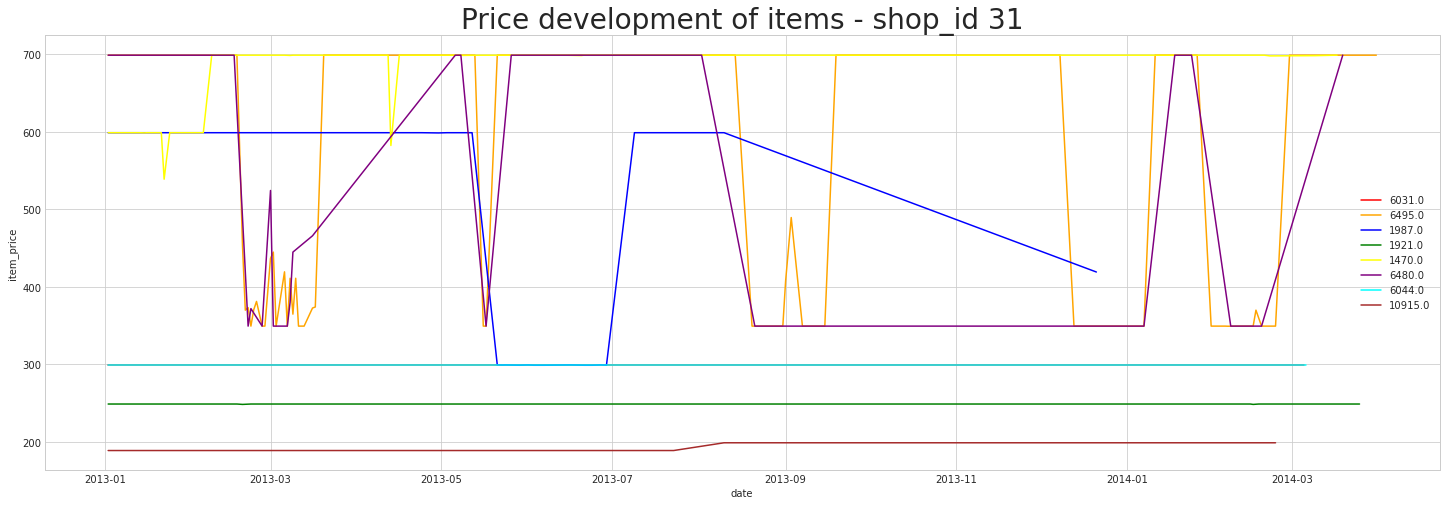

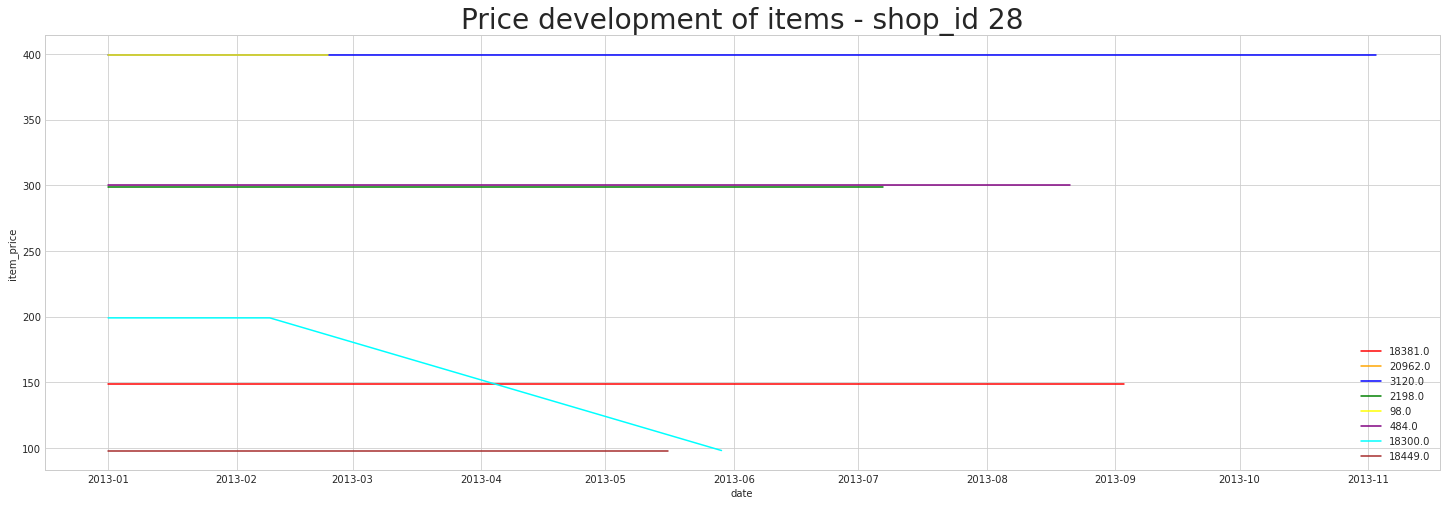

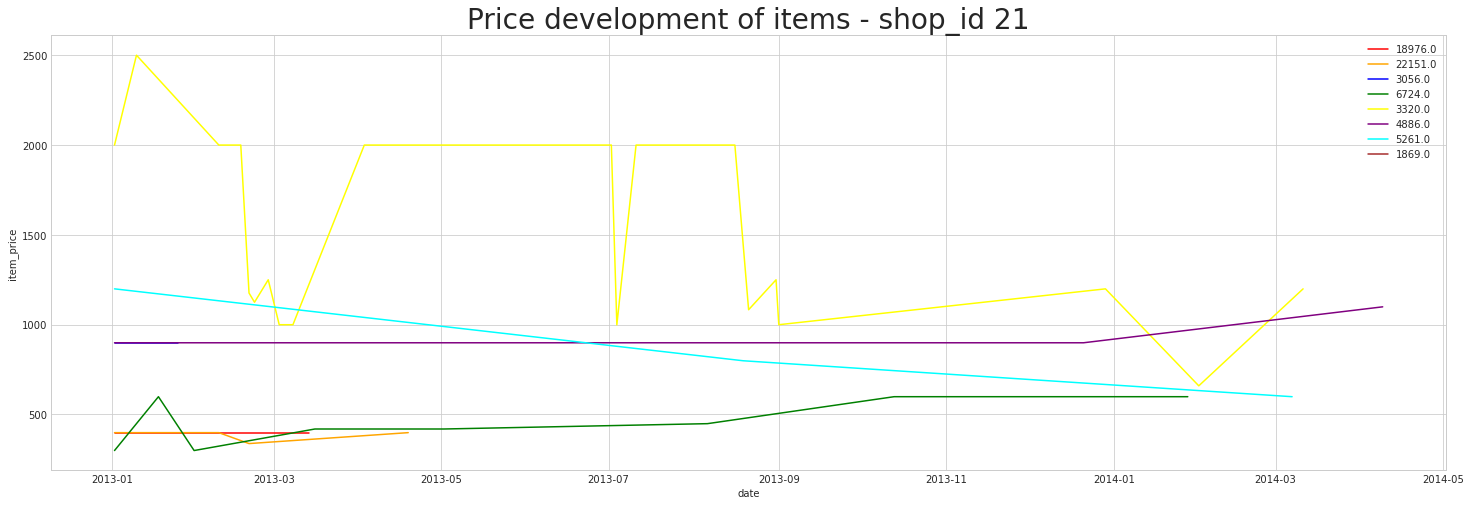

In [20]:
df_tmp = df[df['shop_id'] == 31][['date','item_id','item_price']].reset_index(drop=True)
items = df_tmp['item_id'].unique()[0:8]

fig,axes = plt.subplots(1,1,figsize=(25,8))
colors = ['red','orange','blue','green','yellow','purple','cyan','brown']
for i,item in enumerate(items):
    dprice = df_tmp[df_tmp['item_id'] == item][['item_price','date']]
    
    sns.lineplot(x=dprice['date'],y=dprice['item_price'],ax=axes,color=colors[i],label=item)
    
axes.set_title('Price development of items - shop_id 31',fontsize="28")
axes.legend()
plt.show()


df_tmp = df[df['shop_id'] == 28][['date','item_id','item_price']].reset_index(drop=True)
items = df_tmp['item_id'].unique()[0:8]

fig,axes = plt.subplots(1,1,figsize=(25,8))
colors = ['red','orange','blue','green','yellow','purple','cyan','brown']
for i,item in enumerate(items):
    dprice = df_tmp[df_tmp['item_id'] == item][['item_price','date']]
    
    sns.lineplot(x=dprice['date'],y=dprice['item_price'],ax=axes,color=colors[i],label=item)
    
axes.set_title('Price development of items - shop_id 28',fontsize="28")
axes.legend()
plt.show()



df_tmp = df[df['shop_id'] == 21][['date','item_id','item_price']].reset_index(drop=True)
items = df_tmp['item_id'].unique()[0:8]

fig,axes = plt.subplots(1,1,figsize=(25,8))
colors = ['red','orange','blue','green','yellow','purple','cyan','brown']
for i,item in enumerate(items):
    dprice = df_tmp[df_tmp['item_id'] == item][['item_price','date']]
    
    sns.lineplot(x=dprice['date'],y=dprice['item_price'],ax=axes,color=colors[i],label=item)
    
axes.set_title('Price development of items - shop_id 21',fontsize="28")
axes.legend()
plt.show()

In [21]:
# creating a new feature
df['Sales_per_item'] = df['item_cnt_day'] * df['item_price']

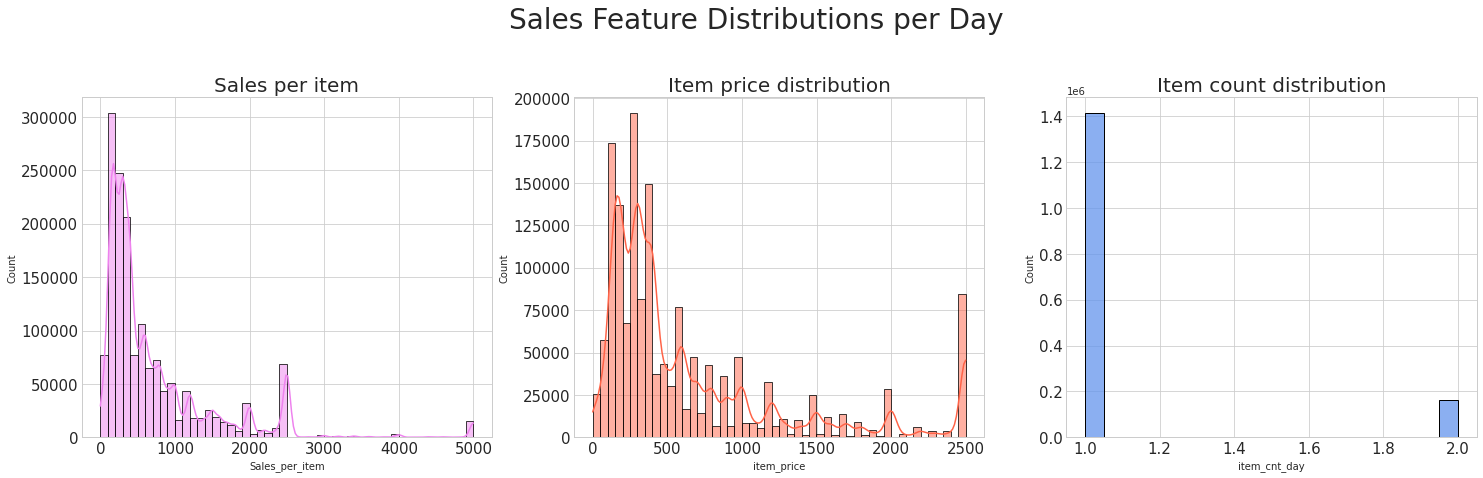

In [22]:
fig = plt.figure(figsize=(25,7))
gs = fig.add_gridspec(1, 3)
ax00 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax02 = fig.add_subplot(gs[0,2])
# setting size of xlabel and ylabel
ax00.tick_params(axis='both', labelsize=15)
ax01.tick_params(axis='both', labelsize=15)
ax02.tick_params(axis='both', labelsize=15)
ax00.set_title('Sales per item', fontsize=20)
ax01.set_title('Item price distribution', fontsize=20)
ax02.set_title('Item count distribution', fontsize=20)
sns.histplot(data = df ,x="Sales_per_item", kde=True, bins=50,ax=ax00, color="violet")
sns.histplot(data = df ,x="item_price", kde=True, ax=ax01, bins=50, color="tomato")
sns.histplot(data = df ,x="item_cnt_day", kde=False, ax=ax02, bins=20, color="cornflowerblue")

fig.subplots_adjust(top=0.8)
fig.suptitle('Sales Feature Distributions per Day', fontsize="28");

In [23]:
train_shop_ids = set(df['shop_id'].unique())
test_shop_ids = set(df_test['shop_id'].unique())

train_item_ids = set(df['item_id'].unique())
test_item_ids = set(df_test['item_id'].unique())

print(f'There are about {len(train_shop_ids)} unique shop ids in train data and {len(test_shop_ids)} shop ids in test data')
print(f'There are about {len(train_item_ids)} unique item ids in train data and {len(test_item_ids)} item ids in test data')
print('--'*50)

df['pair'] = df[['shop_id','item_id']].apply(lambda x: str(x['shop_id'])+'_'+str(x['item_id']),axis=1)
df_test['pair'] = df_test[['shop_id','item_id']].apply(lambda x: str(x['shop_id'])+'_'+str(x['item_id']),axis=1)
train_pair_ids = set(df['pair'].unique())
test_pair_ids = set(df_test['pair'].unique())

print(f'There are {len(train_shop_ids - test_shop_ids)} shop ids present in train data which are not in test data')
print(f'There are {len(train_item_ids - test_item_ids)} item ids present in train data which are not in test data')
print(f'There are {len(train_pair_ids - test_pair_ids)} shop id item id pairs present in train data which are not in test data')

print('--'*50)

print(f'There are {len(test_item_ids - train_item_ids)} item ids present in test data which are not in train data')
print(f'There are {len(test_shop_ids - train_shop_ids)} shop ids present in test data which are not in train data')
print(f'There are {len(test_pair_ids - train_pair_ids)} shop id item id pairs present in test data which are not in train data')

There are about 54 unique shop ids in train data and 42 shop ids in test data
There are about 16101 unique item ids in train data and 5100 item ids in test data
----------------------------------------------------------------------------------------------------
There are 15 shop ids present in train data which are not in test data
There are 14073 item ids present in train data which are not in test data
There are 288746 shop id item id pairs present in train data which are not in test data
----------------------------------------------------------------------------------------------------
There are 3072 item ids present in test data which are not in train data
There are 3 shop ids present in test data which are not in train data
There are 214200 shop id item id pairs present in test data which are not in train data


Total number of unique shop ids: 54


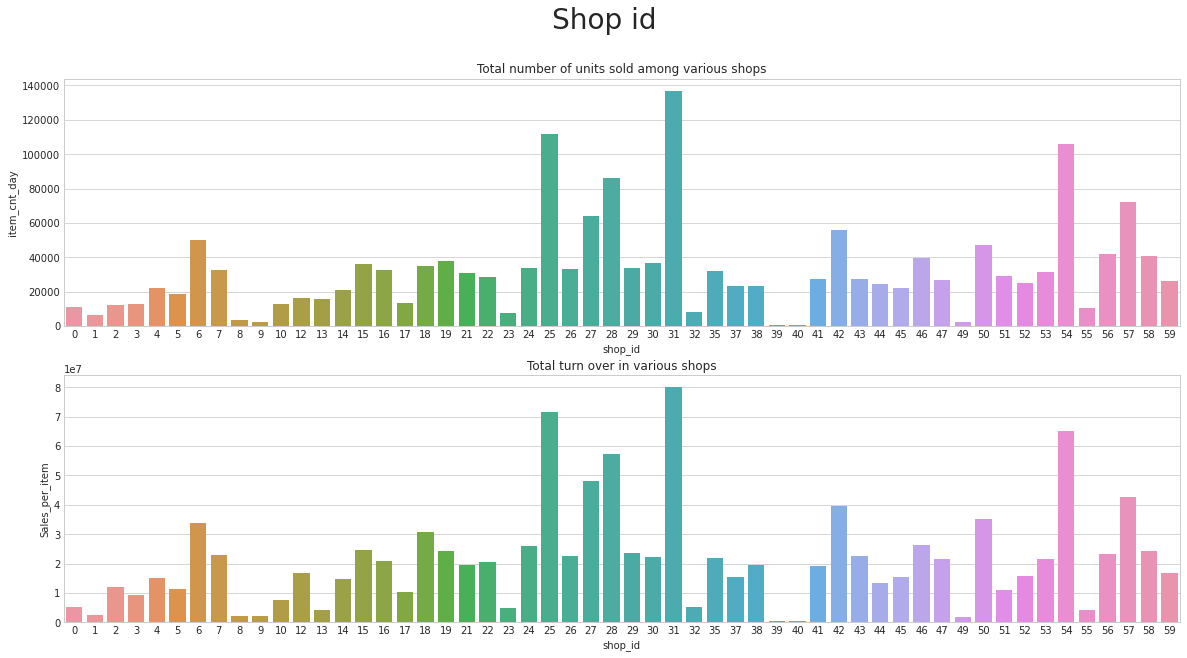

In [24]:
print(f'Total number of unique shop ids: {df["shop_id"].nunique()}')
df_tmp = df[["shop_id","Sales_per_item","item_cnt_day"]]
df_tmp= pd.pivot_table(data=df_tmp,index=["shop_id"],aggfunc={"item_cnt_day":np.sum,"Sales_per_item":np.sum}).reset_index()


fig, axes = plt.subplots(2,1,figsize=(20,10))
sns.barplot(x=df_tmp["shop_id"],y=df_tmp["item_cnt_day"],ax=axes[0])
axes[0].set_title("Total number of units sold among various shops")
sns.barplot(x=df_tmp["shop_id"],y=df_tmp["Sales_per_item"],ax=axes[1])
axes[1].set_title('Total turn over in various shops')
plt.suptitle('Shop id', fontsize="28")
plt.show()

Total number of unique item ids: 16101


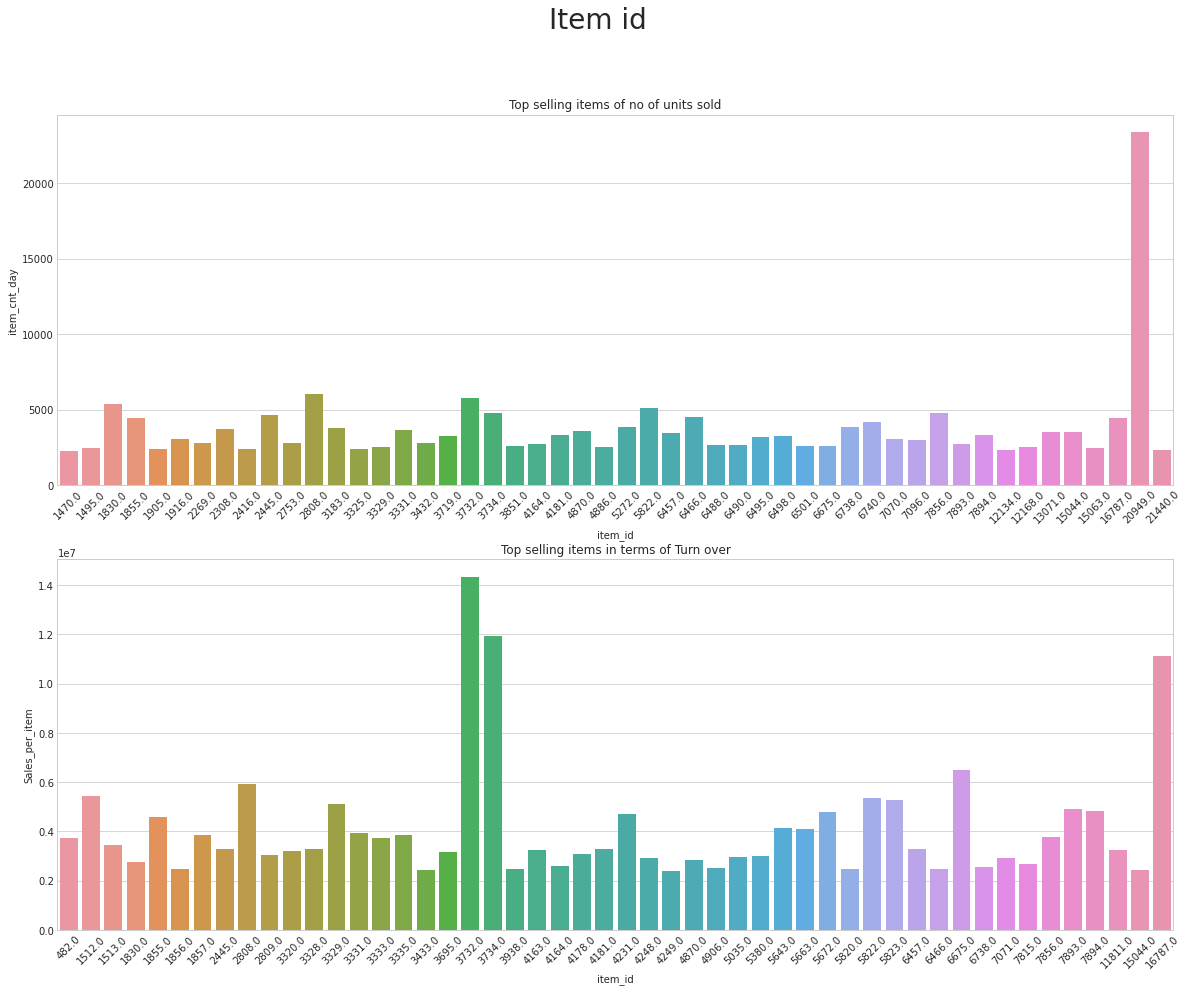

In [25]:
print(f'Total number of unique item ids: {df["item_id"].nunique()}')

df_tmp = df[["item_id","Sales_per_item","item_cnt_day"]]
df_tmp= pd.pivot_table(data=df_tmp,index=["item_id"],aggfunc={"item_cnt_day":np.sum,"Sales_per_item":np.sum}).reset_index()
df_tmp_sales = df_tmp.sort_values(by=['Sales_per_item'],ascending=False).head(50).reset_index(drop=True)
df_tmp_count = df_tmp.sort_values(by=['item_cnt_day'],ascending=False).head(50).reset_index(drop=True)

fig, axes = plt.subplots(2,1,figsize=(20,15))
sns.barplot(x=df_tmp_count["item_id"],y=df_tmp_count["item_cnt_day"],ax=axes[0])
axes[0].set_title("Top selling items of no of units sold")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
sns.barplot(x=df_tmp_sales["item_id"],y=df_tmp_sales["Sales_per_item"],ax=axes[1])
axes[1].set_title('Top selling items in terms of Turn over')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.suptitle('Item id', fontsize="28")
plt.show()
# del df_tmp,df_tmp_count,df_tmp_sales

Total number of unique item categorical ids: 70


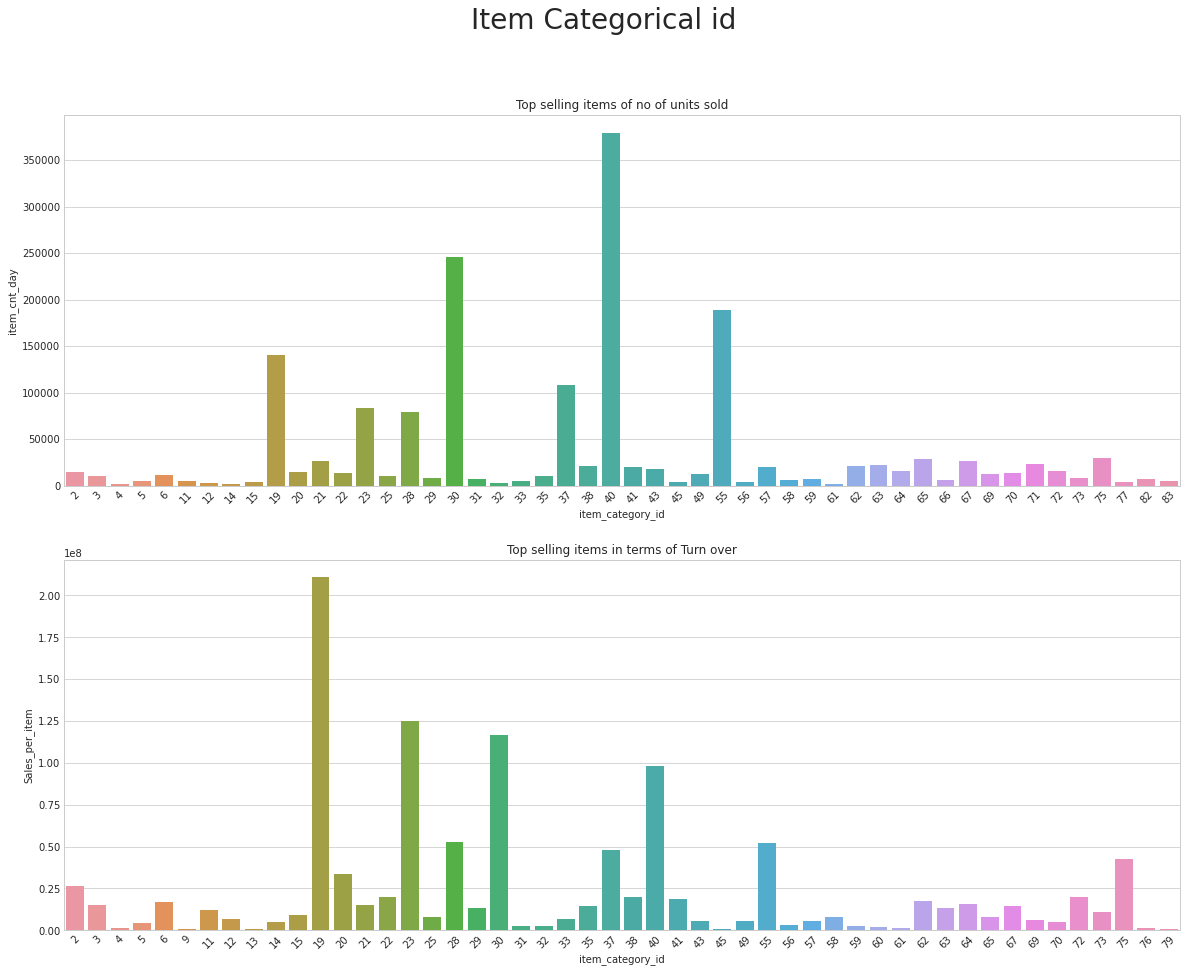

In [26]:
print(f'Total number of unique item categorical ids: {df["item_category_id"].nunique()}')

df_tmp = df[["item_category_id","Sales_per_item","item_cnt_day"]]
df_tmp= pd.pivot_table(data=df_tmp,index=["item_category_id"],aggfunc={"item_cnt_day":np.sum,"Sales_per_item":np.sum}).reset_index()
df_tmp_sales = df_tmp.sort_values(by=['Sales_per_item'],ascending=False).head(50).reset_index(drop=True)
df_tmp_count = df_tmp.sort_values(by=['item_cnt_day'],ascending=False).head(50).reset_index(drop=True)

fig, axes = plt.subplots(2,1,figsize=(20,15))
sns.barplot(x=df_tmp_count["item_category_id"],y=df_tmp_count["item_cnt_day"],ax=axes[0])
axes[0].set_title("Top selling items of no of units sold")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
sns.barplot(x=df_tmp_sales["item_category_id"],y=df_tmp_sales["Sales_per_item"],ax=axes[1])
axes[1].set_title('Top selling items in terms of Turn over')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.suptitle('Item Categorical id', fontsize="28")
plt.show()
del df_tmp,df_tmp_count,df_tmp_sales

In [27]:
item_categories = df['item_category_id'].unique()
tmp = df[['item_id','item_category_id']].groupby(by="item_id").nunique().reset_index()
tmp.head()

,item_id,item_category_id
0,1.00,1
1,12.00,1
2,19.00,1
3,27.00,1
4,28.00,1


In [28]:
#creating some new features
df["Year"] = df["date"].dt.year
df["Month"] = df["date"].dt.month
df["day_of_month"] = df["date"].dt.day
df["day_of_week"] = df["date"].dt.day_of_week

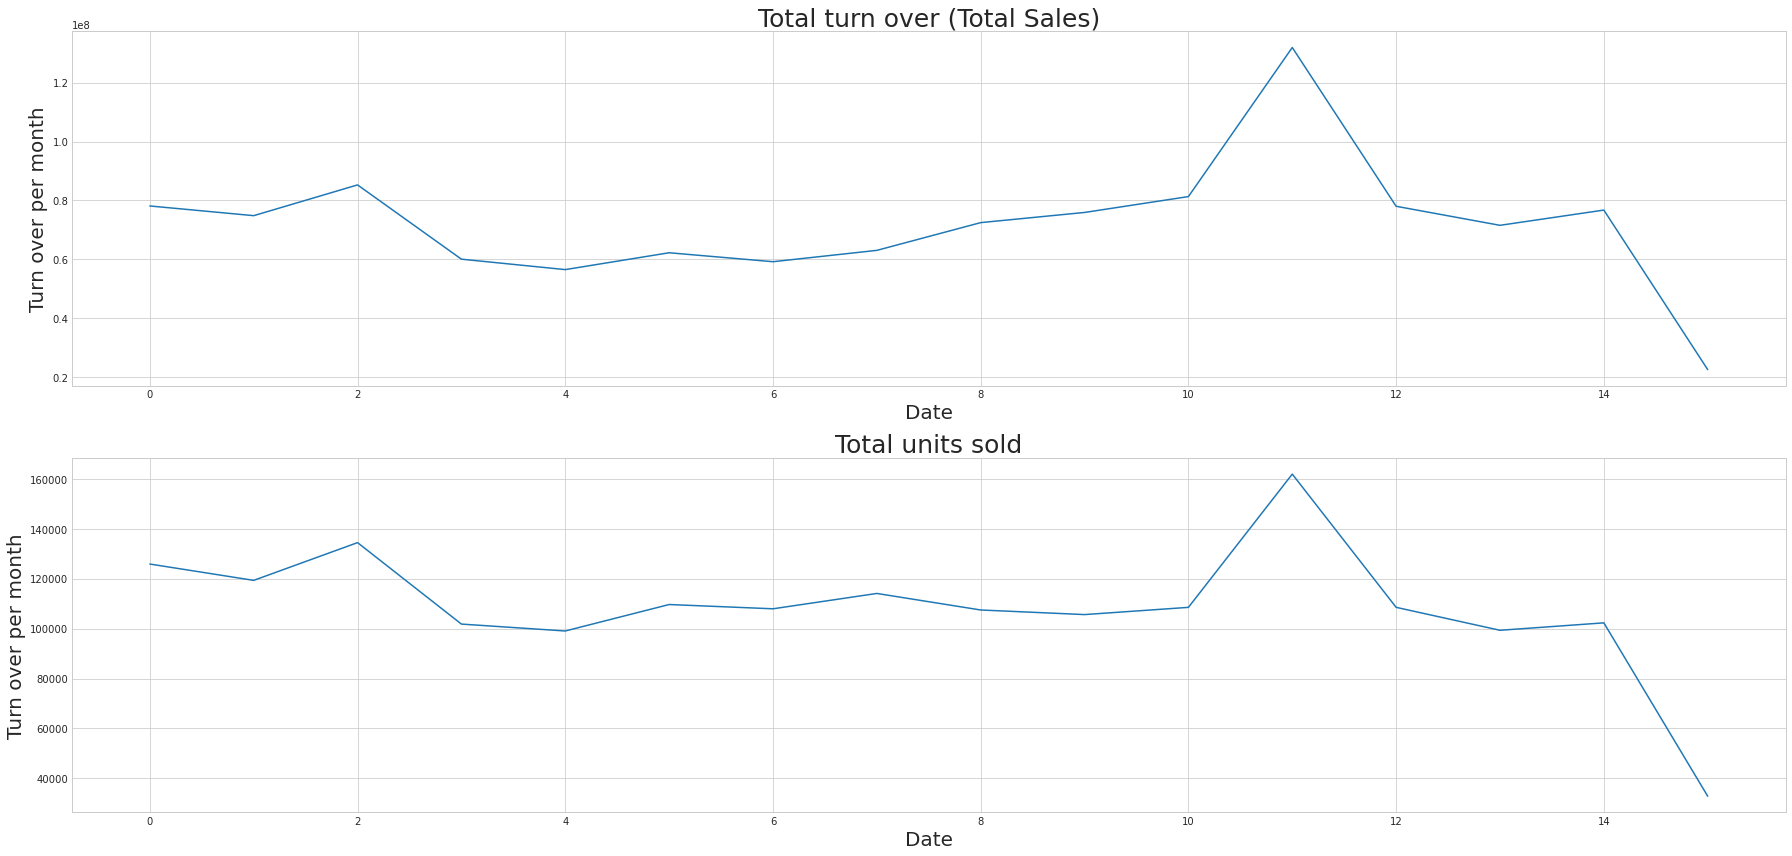

In [29]:
fig,axes = plt.subplots(2,1,figsize=(25,12))
df_tmp = df[['date_block_num','Month','Sales_per_item']].groupby(by=['date_block_num']).aggregate("sum").reset_index()
sns.lineplot(x=df_tmp['date_block_num'],y=df_tmp['Sales_per_item'],ax=axes[0])
axes[0].set_title('Total turn over (Total Sales)',fontsize="25")
axes[0].set_xlabel('Date',fontsize="20")
axes[0].set_ylabel('Turn over per month',fontsize="20")


df_tmp = df[['date_block_num','Month','item_cnt_day']].groupby(by=['date_block_num']).aggregate("sum").reset_index()
sns.lineplot(x=df_tmp['date_block_num'],y=df_tmp['item_cnt_day'],ax=axes[1])
axes[1].set_title('Total units sold',fontsize="25")
axes[1].set_xlabel('Date',fontsize="20")
axes[1].set_ylabel('Turn over per month',fontsize="20")

plt.tight_layout()
del df_tmp
plt.show()


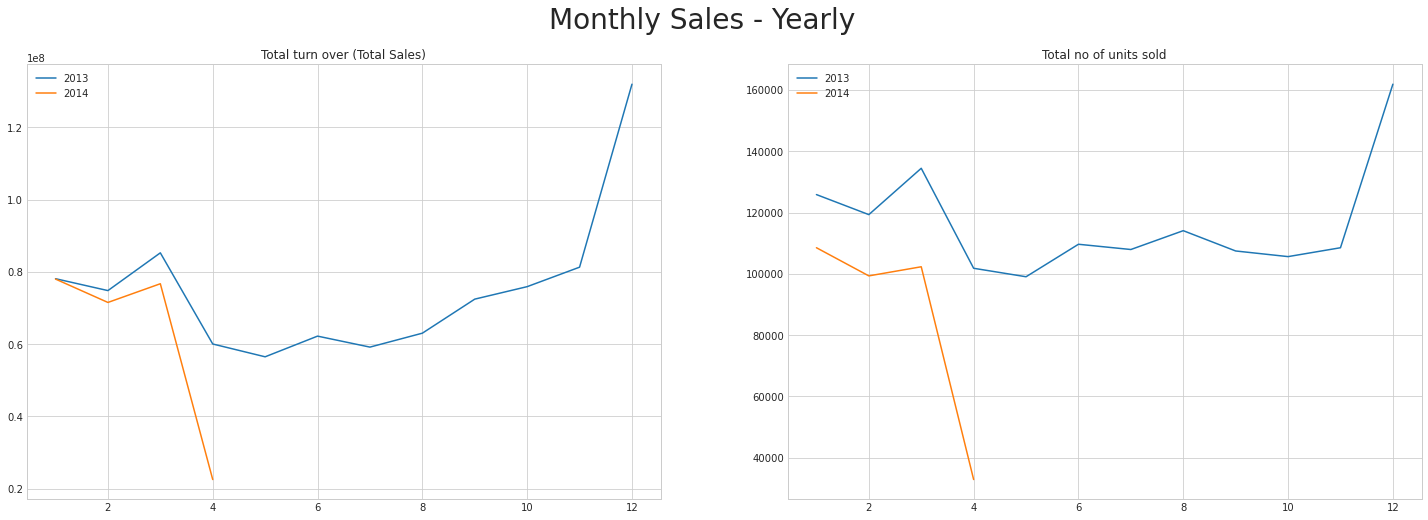

In [30]:
fig,axes = plt.subplots(1,2,figsize=(25,8))
df_tmp = df[['Year','Month','Sales_per_item']].pivot_table(index=['Month'],columns=['Year'],aggfunc={"Sales_per_item":np.sum})
axes[0].plot(df_tmp)
axes[0].set_title('Total turn over (Total Sales)')
axes[0].legend(labels=[i[1] for i in df_tmp.columns])

df_tmp = df[['Year','Month','item_cnt_day']].pivot_table(index=['Month'],columns=['Year'],aggfunc={"item_cnt_day":np.sum})
axes[1].plot(df_tmp)
axes[1].set_title('Total no of units sold')
axes[1].legend(labels=[i[1] for i in df_tmp.columns])
plt.suptitle('Monthly Sales - Yearly',fontsize="28")
plt.show()

In [31]:
df_tmp = df[['date_block_num','shop_id','item_cnt_day']]
df_tmp.groupby(by='date_block_num').aggregate({'shop_id':'nunique'}).reset_index()

,date_block_num,shop_id
0,0,45
1,1,46
2,2,46
3,3,45
4,4,45
5,5,46
6,6,46
7,7,45
8,8,45
9,9,46


In [32]:
df_tmp = df[['date_block_num','shop_id','item_cnt_day']]
dt = pd.pivot_table(index='date_block_num',data=df_tmp,columns='shop_id',aggfunc="sum").reset_index(drop=True)
dt = dt.item_cnt_day
dt.columns.name = 'Month'
dt

Month,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,5334.00,2873.00,1137.00,767.00,2049.00,NaN,3550.00,2453.00,1451.00,NaN,...,3272.00,2567.00,1755.00,2013.00,8540.00,NaN,3173.00,NaN,NaN,1981.00
1,5718.00,3238.00,484.00,795.00,1957.00,871.00,3664.00,2421.00,1142.00,NaN,...,2909.00,2142.00,1646.00,1836.00,7205.00,NaN,2567.00,NaN,NaN,1808.00
2,NaN,NaN,724.00,943.00,1983.00,1344.00,3956.00,2317.00,973.00,NaN,...,3347.00,2473.00,1907.00,2244.00,8375.00,NaN,3011.00,6185.00,3657.00,1900.00
3,NaN,NaN,577.00,645.00,269.00,997.00,3009.00,1534.00,NaN,NaN,...,2658.00,1837.00,1411.00,1463.00,6176.00,NaN,2123.00,5290.00,2787.00,1352.00
4,NaN,NaN,549.00,696.00,1186.00,1099.00,2856.00,1615.00,NaN,NaN,...,2766.00,2093.00,1371.00,1660.00,6184.00,808.00,2091.00,5003.00,2262.00,1283.00
5,NaN,NaN,794.00,759.00,1405.00,1339.00,3402.00,1987.00,NaN,NaN,...,3255.00,1998.00,1677.00,1982.00,6874.00,665.00,2828.00,5397.00,2804.00,1577.00
6,NaN,NaN,804.00,687.00,1366.00,1235.00,3181.00,1971.00,NaN,NaN,...,3070.00,2194.00,1573.00,1909.00,6316.00,733.00,3133.00,5470.00,2969.00,1681.00
7,NaN,NaN,853.00,859.00,1682.00,1498.00,3384.00,2289.00,NaN,NaN,...,3474.00,2049.00,1708.00,2207.00,6931.00,659.00,3180.00,5125.00,2813.00,1980.00
8,NaN,NaN,824.00,897.00,1355.00,1214.00,3415.00,2231.00,NaN,NaN,...,3083.00,1792.00,1839.00,2051.00,6166.00,751.00,2539.00,4774.00,2613.00,1758.00
9,NaN,NaN,715.00,772.00,1343.00,1209.00,3061.00,2049.00,NaN,2389.00,...,3042.00,1710.00,1713.00,1958.00,5567.00,828.00,2230.00,4915.00,2796.00,1607.00


## Modeling

In [33]:
def remove_outliers(df):
    #remove outliers from item_cnt_day
    df = df[df['item_cnt_day'] >= 0]
    upper_quantile = df['item_cnt_day'].quantile(0.95)
    df['item_cnt_day'] = np.where(df['item_cnt_day'] > upper_quantile, upper_quantile, df['item_cnt_day'])
    
    df = df[df['item_price'] >= 0]
    upper_quantile = df['item_price'].quantile(0.95)
    df['item_price'] = np.where(df['item_price'] > upper_quantile, upper_quantile, df['item_price'])
    return df

In [34]:
#load the merged data
df_train = dff.copy()
print(df_train.shape,df_test.shape)

(1579276, 9) (214200, 4)


In [35]:
#removing outliers as per our analysis
df_train = remove_outliers(df_train)
df_train.shape

(1575333, 9)

In [36]:
#clippping values as per kaggle discussion
df_train['item_cnt_day'] = df_train['item_cnt_day'].clip(0,20)

In [37]:
# creating train data
df = df_train[['date_block_num','shop_id','item_id','item_cnt_day']]
data = pd.pivot_table(data=df,index=['shop_id','item_id'],columns=['date_block_num'],fill_value=0,values='item_cnt_day',aggfunc="sum")
data = data.reset_index()
data.columns.name = None
print(df.shape)
print(data.shape)
data.head(4)

(1575333, 4)
(288746, 18)


,shop_id,item_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.00,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,31.00,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,32.00,6,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,33.00,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# Generating test data
#merge
test_data = df_test.drop(columns=['ID'])
test_data = test_data.merge(data,on=['shop_id','item_id'],how="left")
test_data.fillna(0,inplace=True)
test_data = test_data.drop(columns=['shop_id','item_id'])
test_data.head()

,pair,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,5_5037,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,5_5320,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,5_5233,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,5_5232,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5_5268,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [39]:
# train_data -> columns 0 to 32
X_train = data.drop(columns=['shop_id','item_id',15,14],axis=1)
y_train = data[14]

# val_data -> columns 1 to 32
X_val = data.drop(columns=['shop_id','item_id',0,15],axis=1)
y_val = data[15]

#test data-> columns 2 to 33
X_test = test_data.drop(columns=[0,1])

print(X_train.shape,X_val.shape,X_test.shape)

(288746, 14) (288746, 14) (214200, 15)


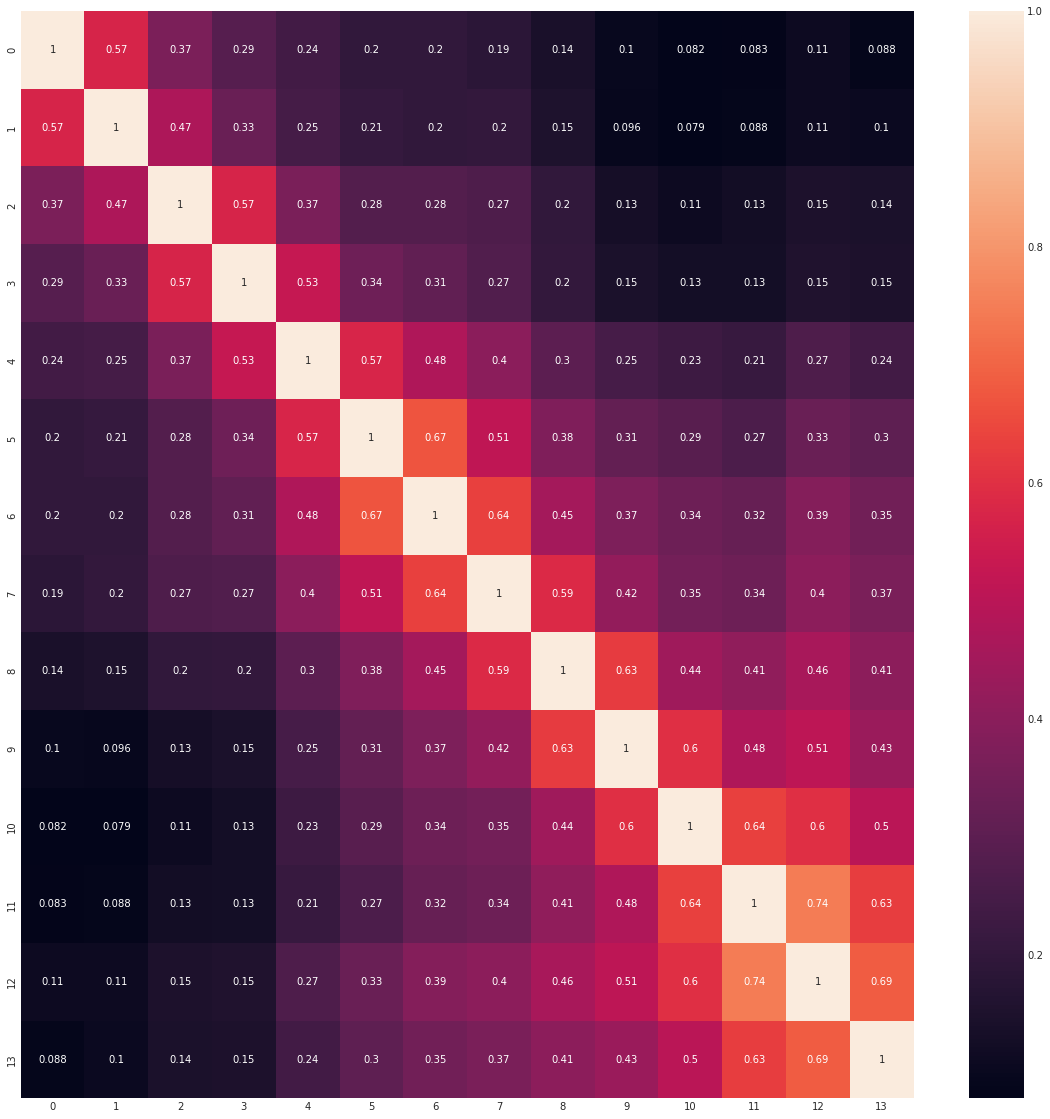

In [40]:
df_corr = X_train.corr()
plt.figure(figsize=(20,20))

sns.heatmap(df_corr,annot=True)
plt.show()

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=42,max_depth=5,n_estimators=50,min_samples_split=4)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

train_rmse = mean_squared_error(y_train,y_train_pred,squared=False)
val_rmse = mean_squared_error(y_val,y_val_pred,squared=False)

print(f'Train rmse: {train_rmse}')
print(f'Val rmse: {val_rmse}')

ValueError: X has 15 features, but RandomForestRegressor is expecting 14 features as input.